In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
import numpy as np

In [3]:
import sys
sys.path.append('..')

from my_code import functions as f

# Data

In [4]:
file_path = '../data/energies/Trial/Strings_Energies_4_aa.txt'  # Replace with the actual path to your 'data.txt' file
string_list, number_list = f.read_data_file(file_path)
score_list = np.array(number_list)/100
angles_list = np.array([f.string_to_numbers(string) for string in string_list])

In [5]:
X, Y, X_validation, Y_validation = f.create_validating_set(angles_list, score_list, percentage=0.1)

In [6]:
# Define the dataset
input_data = torch.tensor(X, dtype=torch.float32)
target_data = torch.tensor(Y, dtype=torch.float32).view(-1, 1)

# Define the validation set
input_validation = torch.tensor(X_validation, dtype=torch.float32)
target_validation = torch.tensor(Y_validation, dtype=torch.float32).view(-1, 1)

# Classical model

In [7]:
input_dim = input_data.size(1)

layers =  [nn.Linear(input_dim*1, input_dim*2), nn.ReLU()]
layers += [nn.Linear(input_dim*2, input_dim*3), nn.ReLU()] 
layers += [nn.Linear(input_dim*3, input_dim*3), nn.ReLU()] 
layers += [nn.Linear(input_dim*3, input_dim*2), nn.ReLU()] 
layers += [nn.Linear(input_dim*2, input_dim*1)] 
layers += [nn.Linear(input_dim*1, input_dim*1), nn.ReLU()] * 2
layers += [nn.Linear(input_dim*1, 1          )] 
Net = nn.Sequential(*layers)

In [8]:
# Create an instance of the network
model = Net

In [9]:
import time

In [10]:

# time
start_time = time.time()

# Define the loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with learning rate 0.001

# Training loop
num_epochs = 100
batch_size = 32

losses = []
losses_epochs = []
losses_epochs_validation = []

for epoch in range(num_epochs):
    # Shuffle the dataset
    indices = torch.randperm(input_data.size(0))
    input_data = input_data[indices]
    target_data = target_data[indices]

    losses_epochs.append(0)

    # Mini-batch training
    for i in range(0, input_data.size(0), batch_size):
        inputs = input_data[i:i+batch_size]
        targets = target_data[i:i+batch_size]

        # Forward pass
        outputs = model(inputs)

        # Compute the loss
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Store the loss
        losses.append(loss.item())

        print('- Epoch [{}/{}], i: [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i, input_data.size(0), loss.item()), end='\r')

        # add to the epoch loss
        losses_epochs[-1] += loss.item() / (input_data.size(0) / batch_size)

    # Compute the validation loss
    outputs_validation = model(input_validation)
    loss_validation = criterion(outputs_validation, target_validation)
    losses_epochs_validation.append(loss_validation.item())    

    # time
    # Compute elapsed time and remaining time
    elapsed_time = time.time() - start_time
    avg_time_per_epoch = elapsed_time / (epoch + 1)
    remaining_epochs = num_epochs - (epoch + 1)
    estimated_remaining_time = avg_time_per_epoch * remaining_epochs

    # Convert remaining time to hours, minutes, and seconds for better readability
    hours, remainder = divmod(estimated_remaining_time, 3600)
    minutes, seconds = divmod(remainder, 60)

    # Print the loss and remaining time for this epoch
    print('Epoch [{}/{}], Loss: {:.4f}, Time remaining: ~{}h {}m {:.0f}s'.format(
        epoch+1, num_epochs, losses_epochs[-1], hours, minutes, seconds))



Epoch [1/100], Loss: 5.2838, Time remaining: ~0.0h 2.0m 6s
Epoch [2/100], Loss: 4.8602, Time remaining: ~0.0h 2.0m 1s
Epoch [3/100], Loss: 4.5635, Time remaining: ~0.0h 1.0m 55s
Epoch [4/100], Loss: 4.3040, Time remaining: ~0.0h 1.0m 53s
Epoch [5/100], Loss: 4.0750, Time remaining: ~0.0h 1.0m 50s
Epoch [6/100], Loss: 3.8805, Time remaining: ~0.0h 1.0m 48s
Epoch [7/100], Loss: 3.6979, Time remaining: ~0.0h 1.0m 47s
Epoch [8/100], Loss: 3.5230, Time remaining: ~0.0h 1.0m 45s
Epoch [9/100], Loss: 3.3648, Time remaining: ~0.0h 1.0m 41s
Epoch [10/100], Loss: 3.1985, Time remaining: ~0.0h 1.0m 41s
Epoch [11/100], Loss: 3.0583, Time remaining: ~0.0h 1.0m 40s
Epoch [12/100], Loss: 2.9219, Time remaining: ~0.0h 1.0m 38s
Epoch [13/100], Loss: 2.7422, Time remaining: ~0.0h 1.0m 36s
Epoch [14/100], Loss: 2.6156, Time remaining: ~0.0h 1.0m 34s
Epoch [15/100], Loss: 2.5010, Time remaining: ~0.0h 1.0m 32s
Epoch [16/100], Loss: 2.3461, Time remaining: ~0.0h 1.0m 31s
Epoch [17/100], Loss: 2.2432, Time 

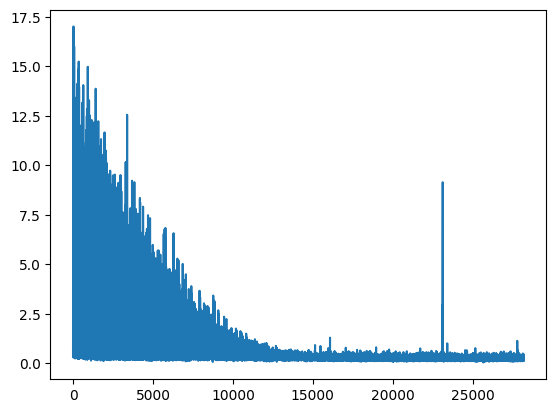

In [11]:
#plot the loss
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

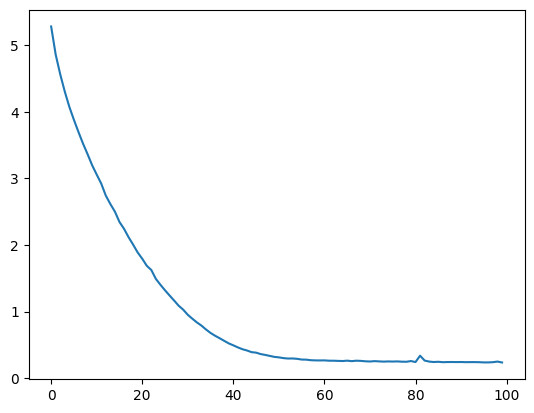

In [12]:
#plot the loss
import matplotlib.pyplot as plt
plt.plot(losses_epochs)
plt.show()

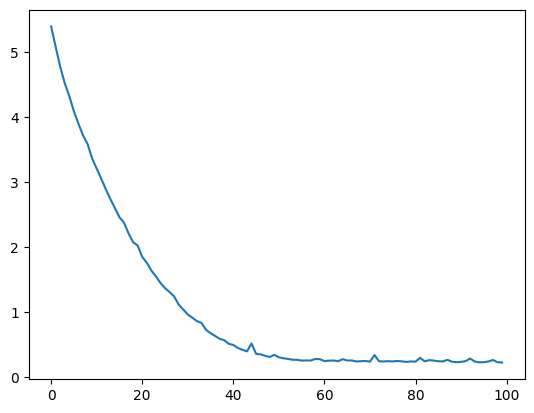

In [13]:
import matplotlib.pyplot as plt
plt.plot(losses_epochs_validation)
plt.show()

In [14]:
avg_loss = 0
for x, (i, t) in enumerate(zip((input_validation), target_validation)):
    loss = criterion(model(i), t)
    avg_loss += loss/len(target_validation)
    print('i: {}, target: {:.3f}, output: {:.3f}, loss: {:.3f}'.format(x, t.item(), model(i).item(), loss))
    print('')

print('Average loss: {:.3f}'.format(avg_loss))

i: 0, target: 9.722, output: 9.244, loss: 0.228

i: 1, target: -1.301, output: -1.178, loss: 0.015

i: 2, target: -0.605, output: -1.132, loss: 0.278

i: 3, target: -0.726, output: -1.278, loss: 0.304

i: 4, target: -1.680, output: -1.195, loss: 0.235

i: 5, target: 8.929, output: 9.244, loss: 0.100

i: 6, target: 9.564, output: 9.244, loss: 0.102

i: 7, target: -0.778, output: -1.022, loss: 0.059

i: 8, target: -0.439, output: -0.874, loss: 0.189

i: 9, target: -1.503, output: -1.244, loss: 0.067

i: 10, target: -1.598, output: -1.280, loss: 0.101

i: 11, target: -0.714, output: -1.062, loss: 0.121

i: 12, target: -0.880, output: -1.246, loss: 0.134

i: 13, target: -0.732, output: -0.570, loss: 0.026

i: 14, target: -0.487, output: -0.825, loss: 0.114

i: 15, target: -2.039, output: -1.406, loss: 0.400

i: 16, target: -1.594, output: -0.918, loss: 0.457

i: 17, target: -0.923, output: -0.630, loss: 0.086

i: 18, target: -0.368, output: -1.138, loss: 0.593

i: 19, target: 0.597, output

# Save the Notebook as a PDF

In [15]:
# SAVE THE NOTEBOOK

from IPython.display import Javascript

# Define the function to save the notebook
def save_notebook():
    display(Javascript('IPython.notebook.save_notebook()'))

# Call the save_notebook function to save the notebook
save_notebook()



<IPython.core.display.Javascript object>

In [17]:
# EXPORT THE NOTEBOOK AS PDF

import subprocess
import os

name_notebook = "0724-small_classical_model.ipynb"  

output_filename = "results/"+ name_notebook[:4] +"/" + name_notebook[:-6] + "_0.pdf"

#check if the output file already exists
while os.path.exists(output_filename):
    print("The file {} already exists".format(output_filename))
    output_filename = output_filename[:-5] + str(int(output_filename[-5]) + 1) + ".pdf"
    print("Trying to save the file as {}".format(output_filename))
    

subprocess.run(["jupyter", "nbconvert", "--to", "pdf", "--output", output_filename, name_notebook])




The file results/0724/0724-small_classical_model_0.pdf already exists
Trying to save the file as results/0724/0724-small_classical_model_1.pdf
The file results/0724/0724-small_classical_model_1.pdf already exists
Trying to save the file as results/0724/0724-small_classical_model_2.pdf
The file results/0724/0724-small_classical_model_2.pdf already exists
Trying to save the file as results/0724/0724-small_classical_model_3.pdf


CompletedProcess(args=['jupyter', 'nbconvert', '--to', 'pdf', '--output', 'results/0724/0724-small_classical_model_3.pdf', '0724-small_classical_model.ipynb'], returncode=0)